## Loading the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display, Markdown, Latex
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv("C:/Users/hp/Desktop/archit/Dataset.csv")
df_credit=df
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Q1: Perform EDA and any data cleaning if necessary.

In [3]:
df.Job.unique()

array([2, 1, 3, 0], dtype=int64)

In [4]:
df.shape

(1000, 10)

In [5]:
n_unique=df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


Number of null values:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


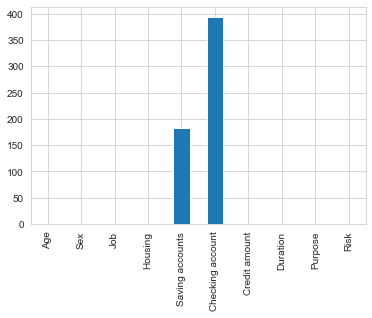

In [6]:
is_null=df.isnull().sum()
print("Number of null values:\n{}".format(is_null))
is_null.plot(kind= "bar")
plt.show()

##### In the result it is shown that there are 183 missing values in Saving accounts and 194 misisng values in Checking account.
> The percentage of missisng values are 18.3 and 39.4 respectively. 

In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [10]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

Text(186.64000000000016, 0.5, 'Features')

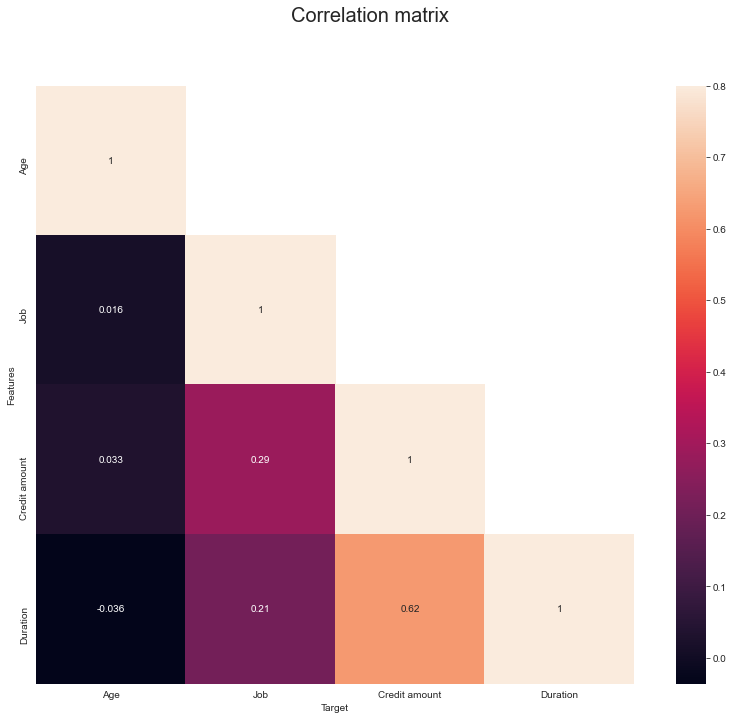

In [11]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,11)
fig.suptitle('Correlation matrix', fontsize=20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.xlabel('Target')
plt.ylabel('Features')

We have a data size of 1000 (samples) X 10 (properties).
Among the 10 properties, we cosnider the <b>Risk</B> as the target variable (dependent variable)

There are 4 variables with int64 type, and 6 with object(string) type.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
train=pd.read_csv("C:/Users/hp/Desktop/archit/Dataset.csv")

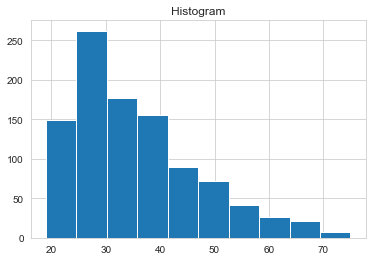

In [14]:
plt.hist(train["Age"])
plt.title("Histogram")
plt.show()

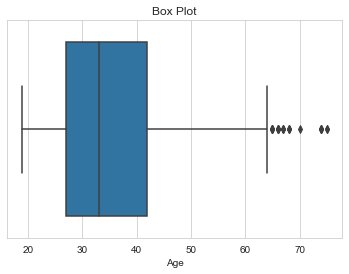

In [15]:
sns.boxplot(train ["Age"])
plt.title("Box Plot")
plt.show()

___

## Q2: Perform one hot encoding for categorical variables

In [16]:
df=pd.read_csv("C:/Users/hp/Desktop/archit/Dataset.csv")

df_numeric=df.drop(['Job','Housing','Sex','Saving accounts','Checking account','Purpose','Risk'],axis=1)
df = pd.get_dummies(df, columns=['Housing','Sex','Saving accounts','Checking account','Purpose'])
df['Risk']=df['Risk'].map({'good':1,'bad':0})
df

,Age,Job,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Sex_female,Sex_male,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


___

## Q3: Visualize the histograms of numerical features. Do you observe skewness in the data? If yes

In [17]:
# Distribution graphs (histogram/bar graph) of column data with (num)
def plotNumColumnDistribution(df,nGraphPerRow):
    print(f'=== Distribution of features with number values ===')
    
    df = df[[col for col in df.select_dtypes(np.number)]]
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 3 * nGraphRow))
 
    for i, col in enumerate(columnNames):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        sns.distplot(df[col], color='blue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

=== Distribution of features with number values ===
['Age', 'Credit amount', 'Duration']


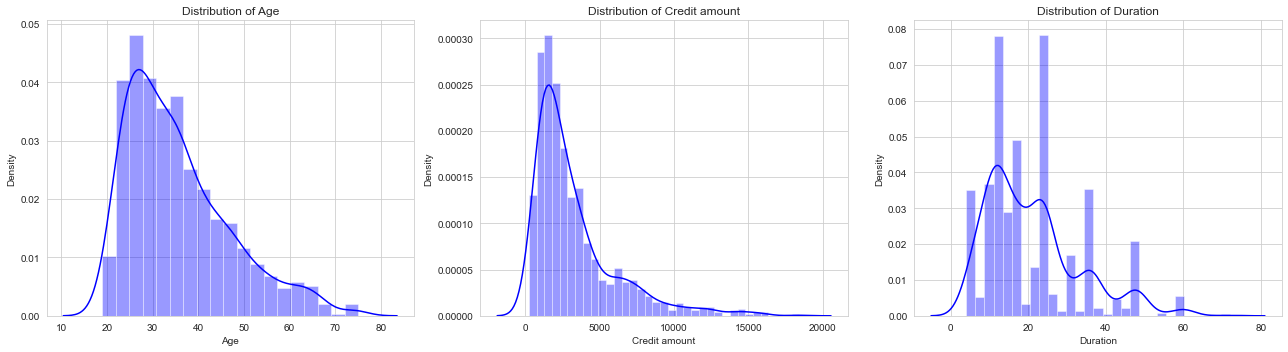

In [18]:
plotNumColumnDistribution(df_numeric, 3)

#### The two values Age and Credit amount are distributed Unevenly and are Skewed to the left. It may affact the prediction later.

In [19]:
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [20]:
# log transfer
df_numeric = log_transform(df_numeric, ['Age', 'Credit amount', 'Duration'])

=== Distribution of features with number values ===
['Age', 'Credit amount', 'Duration']


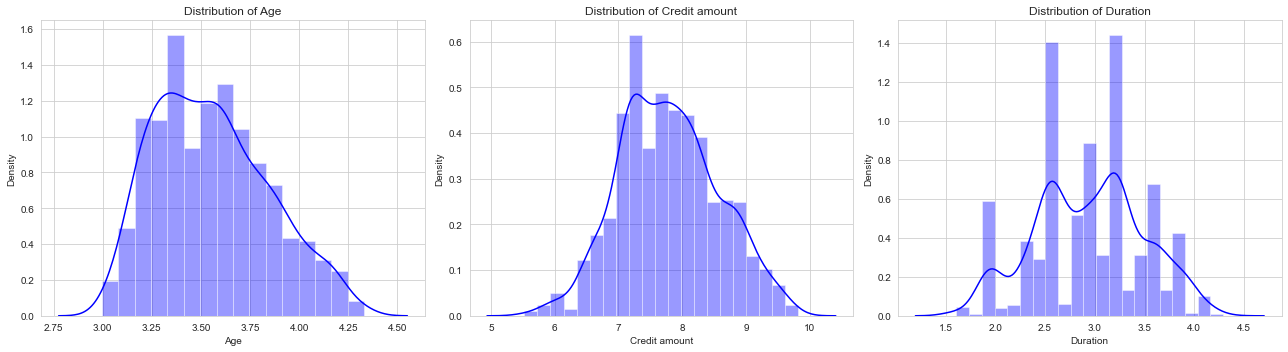

In [21]:
# check the result
plotNumColumnDistribution(df_numeric, 3)

### From the above histogram we can say that the data has been normalized

___

## Q4: Apply Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(df)
scaled_frame = pd.DataFrame(std_scale)
scaled_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.766456,0.146949,-0.745131,-1.236478,0.654654,-0.347960,0.634448,-0.466933,-0.670280,0.670280,...,-0.606621,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,0.146949,0.949817,2.248194,-1.527525,-0.347960,0.634448,-0.466933,1.491914,-1.491914,...,1.648476,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,-1.383771,-0.416562,-0.738668,0.654654,-0.347960,0.634448,-0.466933,-0.670280,0.670280,...,-0.606621,-0.259299,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.146949,1.634247,1.750384,0.654654,2.873893,-1.576173,-0.466933,-0.670280,0.670280,...,-0.606621,-0.259299,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.146949,0.566664,0.256953,-1.527525,2.873893,-1.576173,-0.466933,-0.670280,0.670280,...,-0.606621,-0.259299,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


## Q5: Choose only the numerical features for clustering

In [23]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(df_numeric)
scaled_frame = pd.DataFrame(std_scale, columns=df_numeric.columns)
scaled_frame.head()

,Age,Credit amount,Duration
0,2.282879,-0.933992,-1.822056
1,-1.438777,1.163149,1.741206
2,1.227217,-0.181750,-0.688500
3,0.940950,1.525385,1.502020
4,1.491441,0.904761,0.508940


In [24]:
scaled_frame = pd.DataFrame(scaled_frame)
scaled_frame.head()
#plt.plot(Numerical_features)
#print(Numerical_features)

,Age,Credit amount,Duration
0,2.282879,-0.933992,-1.822056
1,-1.438777,1.163149,1.741206
2,1.227217,-0.181750,-0.688500
3,0.940950,1.525385,1.502020
4,1.491441,0.904761,0.508940


___

## Q6: Apply elbow method to find best number of clusters. Plot the graph.

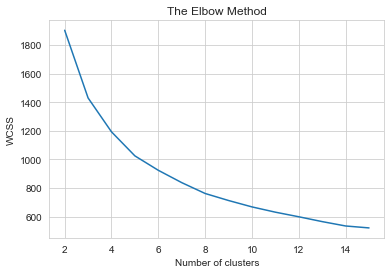

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can observe from the above graph that optimal number of clusters are 4

 The Elbow Method implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

---------------------------------------------------------------------------------------------------------------------------

## Q7: Choose optimum number of clusters and visualize it using PCA

Explained variance is: [1.62796211 1.00456679 0.37047411]
Explained variance ratio [0.54211138 0.33452074 0.12336788]


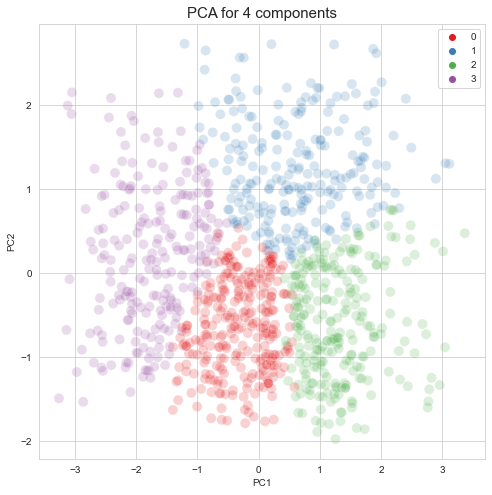

In [26]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3).fit(scaled_frame)
pcad = pca.transform(scaled_frame)
kmeans = KMeans(n_clusters = 4,random_state = 111)
y_means = kmeans.fit(scaled_frame)
print("Explained variance is:",pca.explained_variance_)
print("Explained variance ratio",pca.explained_variance_ratio_)
# First component has most of the data in it.

plt.figure(figsize = (8,8))
sns.scatterplot(pcad[:,0], pcad[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('PCA for 4 components', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

___


## Q8: Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics

In [27]:
!\pip install xgboost

'\pip' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
df_cat=df.drop(df_numeric.columns.values,axis=1)
y = df_cat['Risk']
df_cat.drop('Risk',inplace=True,axis=1)
X = pd.concat([df_cat,df_numeric],axis=1)

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [30]:
# CV model
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [31]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 72.90% (1.98%)


In [32]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))
f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [33]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 72.900000, Recall=72.900000, Precision=71.947000, f1score=72.420000



The following are the outputs after implementing KFOLD CV and calculating evaluation metrics   
>Accuracy= 72.900000     
Recall=72.900000           
Precision=71.947000
>F1 score=72.420000



### We prefer the XGBoost to build a robust model.  We should always perform k-fold cross validation.

Thus, our model is best fit the Acquiring the predictions of the Credit card Risk. 